# KNN model for predicting racket type using datasets P1, P2, and P3, based on **peaks** - Sound

### Model Description

This notebook implements a K-Nearest Neighbors (KNN) model to predict the type of a racket (RB, RO, RR, RV) based on sound features extracted from audio files. The workflow involves reading `.wav` files, **extracting peaks** using FFT, and training the model using these features. The model's performance is evaluated using accuracy metrics and visualized through scatter plots and a confusion matrix.

### Import libraries

In [2]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.io import wavfile
from scipy.fft import fft
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# import openpyxl


### Import Tools Functions

In [3]:
import sys
# Reach the project root
notebook_path = os.path.abspath('')
project_root = os.path.abspath(os.path.join(notebook_path, '../../../'))
functions_path = os.path.join(project_root, 'Functions')

# Add Functions folder
if functions_path not in sys.path:
    sys.path.append(functions_path)

['P1_RB_1_C_1.wav', 'P1_RB_1_C_2.wav', 'P1_RB_1_C_3.wav', 'P1_RB_1_S_1.wav', 'P1_RB_1_S_2.wav', 'P1_RB_1_S_3.wav', 'P1_RB_1_V_1.wav', 'P1_RB_1_V_2.wav', 'P1_RB_1_V_3.wav', 'P1_RB_2_C_1.wav', 'P1_RB_2_C_2.wav', 'P1_RB_2_C_3.wav', 'P1_RB_2_S_1.wav', 'P1_RB_2_S_2.wav', 'P1_RB_2_S_3.wav', 'P1_RB_2_V_1.wav', 'P1_RB_2_V_2.wav', 'P1_RB_2_V_3.wav', 'P1_RB_3_C_1.wav', 'P1_RB_3_C_2.wav', 'P1_RB_3_C_3.wav', 'P1_RB_3_S_1.wav', 'P1_RB_3_S_2.wav', 'P1_RB_3_S_3.wav', 'P1_RB_3_V_1.wav', 'P1_RB_3_V_2.wav', 'P1_RB_3_V_3.wav', 'P1_RB_4_C_1.wav', 'P1_RB_4_C_2.wav', 'P1_RB_4_C_3.wav', 'P1_RB_4_S_1.wav', 'P1_RB_4_S_2.wav', 'P1_RB_4_S_3.wav', 'P1_RB_4_V_1.wav', 'P1_RB_4_V_2.wav', 'P1_RB_4_V_3.wav', 'P1_RB_5_C_1.wav', 'P1_RB_5_C_2.wav', 'P1_RB_5_C_3.wav', 'P1_RB_5_S_1.wav', 'P1_RB_5_S_2.wav', 'P1_RB_5_S_3.wav', 'P1_RB_5_V_1.wav', 'P1_RB_5_V_2.wav', 'P1_RB_5_V_3.wav', 'P1_RB_6_C_1.wav', 'P1_RB_6_C_2.wav', 'P1_RB_6_C_3.wav', 'P1_RB_6_S_1.wav', 'P1_RB_6_S_2.wav', 'P1_RB_6_S_3.wav', 'P1_RB_6_V_1.wav', 'P1_RB_6_V_

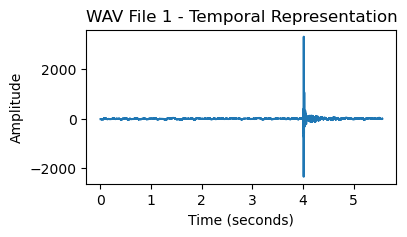

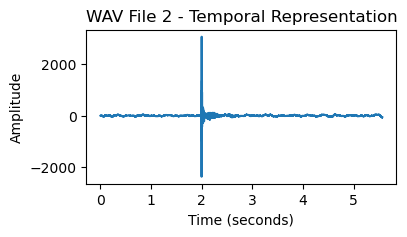

In [4]:
from readWavFolder import readWavFolder
    
samplerateVect,testWavFileVect,filename = readWavFolder("../../../Data/Sound/P1/")
print(filename)
for i, wav_data in enumerate(testWavFileVect[:2]):
    plt.figure(figsize=(4, 2))
    time_axis = [x / samplerateVect[i] for x in range(len(wav_data))]
    plt.plot(time_axis, wav_data[:, 0])  # Plot only the first channel
    plt.title(f"WAV File {i + 1} - Temporal Representation")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()


Spectrum

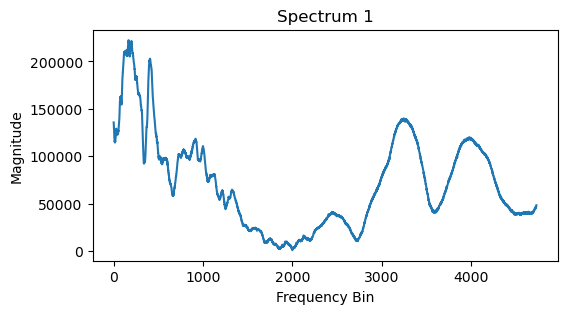

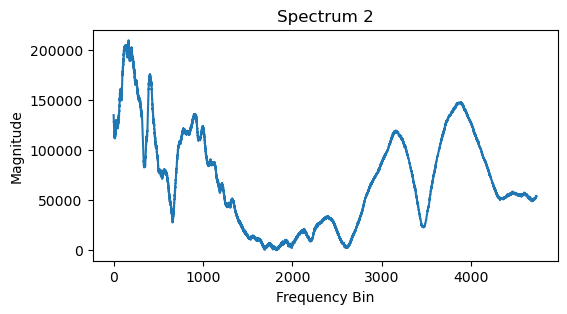

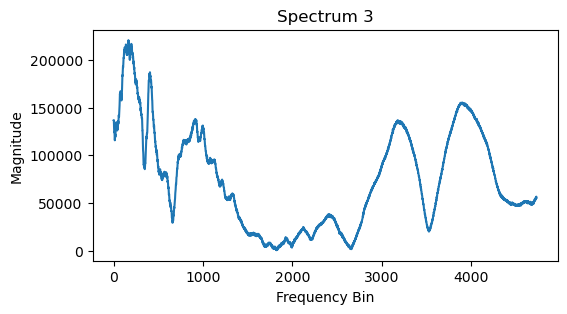

In [13]:
from spectrumFromSignal import spectrumFromSignal


spectrumVect=[]
spectrumVectFreqs=[]
for i in range(len(testWavFileVect)):
    spectrum,freqs = spectrumFromSignal(testWavFileVect[i], samplerateVect[i])
    spectrumVect.append(spectrum)
    spectrumVectFreqs.append(freqs)

for idx, spectrum in enumerate(spectrumVect[:3]):
    plt.figure(figsize=(6, 3))
    plt.plot(spectrum)
    plt.title(f"Spectrum {idx + 1}")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Magnitude")
    plt.show()



Peaks

[1951 1926 1924 1917 2193 2116 2389 2397 4348 4581 4545 4565 4550 4555
 4498 4492 4494 4479 3169 3167  888  417 3869 3872  161] {'peak_heights': array([  6722.56416974,   7390.35492752,   7395.271829  ,   7418.83627837,
        13415.21573847,  17918.96649966,  31831.43296691,  31880.33630526,
        52415.21020876,  55499.57219895,  55579.24671042,  55592.78955382,
        55602.95440748,  55630.64654048,  56393.83296827,  56412.13712719,
        56414.14223014,  56502.43653612, 116413.37230467, 116415.99706343,
       126723.78969305, 144143.40358284, 145624.42271892, 145625.38135532,
       198891.92365741])}


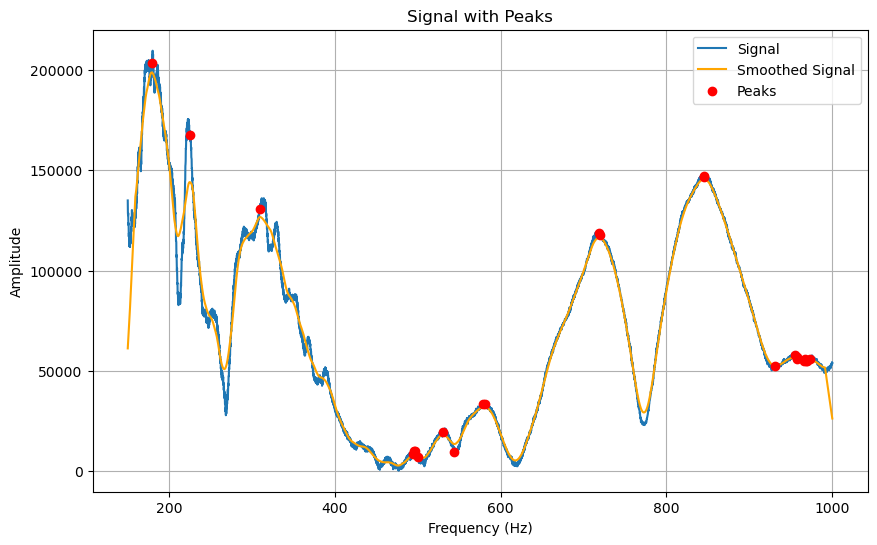

In [17]:
from extractPeakFromSignal import extractPeakFromSignal

smoothing=100
peaks,peaksAmplitude=extractPeakFromSignal(spectrumVect[1],smoothing=smoothing,num_peaks=25)
print(peaks,peaksAmplitude)


# Plot the signal with the peaks
smoothed_signal = np.convolve(spectrumVect[1], np.ones(smoothing)/smoothing, mode='same')
freqs= spectrumVectFreqs[1]

plt.figure(figsize=(10, 6))
plt.plot(freqs, spectrumVect[1], label="Signal")
plt.plot(freqs, smoothed_signal, label="Smoothed Signal", color="orange")
plt.scatter(freqs[peaks], spectrumVect[1][peaks], color="red", label="Peaks", zorder=5)
plt.title("Signal with Peaks")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


## Main

In [22]:
raquetteTypeList = {"RB": 0, "RO": 1, "RR": 2, "RV": 3}
used = False
bd=10

# Liste pour stocker les résultats
results = []
for chanel in range (1,3):
    if chanel ==1:
        c = 0
    else:
        c = 1
    print("Chanel", c )

    X_Hz = []
    X_Amplitude = []
    Y_Label = []

        

    # Create a DataFrame to store details of each wav file
    wav_files_data = []

    # Process each folder (P1, P2, P3)
    for folder, folder_path in [("P1", "../../../Data/Sound/P1"), 
                                ("P2", "../../../Data/Sound/P2"), 
                                ("P3", "../../../Data/Sound/P3")]:
        sample_rates, wav_files, file_names = readWavFolder(folder_path)
        
        for sample_rate, wav_file, file_name in zip(sample_rates, wav_files, file_names):
            wav_files_data.append({
                "Folder": folder,
                "File_Name": file_name,
                "Sample_Rate": sample_rate,
                "Signal": wav_file
            })

    # Convert the list of dictionaries into a DataFrame
    wav_files_df = pd.DataFrame(wav_files_data)

    # Display the DataFrame
    print(wav_files_df)

    

    # Pour chaque fichier wav on extrait son spectre et on le filtre entre 150 et 1000hz et on prend les n meilleurs peaks
    for i in range(len(wav_files_df["Signal"])):
        if "C" in wav_files_df["File_Name"][i]:
            if 'RB' in wav_files_df["File_Name"][i]:
                raquetteType = 'RB'
            elif 'RR' in wav_files_df["File_Name"][i]:
                raquetteType = 'RR'
            elif 'RO' in wav_files_df["File_Name"][i]:
                raquetteType = 'RO'
            elif 'RV' in wav_files_df["File_Name"][i]:
                raquetteType = 'RV'
                
            spectrum,freqs = spectrumFromSignal(wav_files_df["Signal"][i], wav_files_df["Sample_Rate"][i])
            spectrumVect.append(spectrum) 

            band_frequencies,band_energies = extractPeakFromSignal(signal=spectrum,smoothing=20,num_peaks=10)

            X_Hz.append(band_frequencies)
            # print(band_energies)
            X_Amplitude.append(band_energies["peak_heights"])

            Y_Label.append(raquetteType)

    # On normalise les amplitudes
    X_Amplitude = [peak_values / np.max(peak_values) for peak_values in X_Amplitude]

    # Ensure all arrays in X_peaksHz and X_peaksAmplitude have the same length
    max_length = max(max(len(peaks) for peaks in X_Hz), max(len(amps) for amps in X_Amplitude))
    X_Hz_padded = [np.pad(peaks, (0, max_length - len(peaks)), constant_values=0) for peaks in X_Hz]
    X_Amplitude_padded = [np.pad(amps, (0, max_length - len(amps)), constant_values=0) for amps in X_Amplitude]

    # Combine the frequencies and amplitudes into a single feature matrix
    X = np.hstack((np.array(X_Hz_padded), np.array(X_Amplitude_padded)))

    # Encode string labels into integers
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(Y_Label)

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)
    # Définir les plages de valeurs pour les hyperparamètres
    n_neighbors_range = range(1, 21)  # Nombre de voisins
    weights_options = ['uniform', 'distance']  # Méthode de pondération
    metric_options = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Métriques

    # Tester toutes les combinaisons d'hyperparamètres
    for n_neighbors in n_neighbors_range:
        for weights in weights_options:
            for metric in metric_options:
                # Créer et entraîner le modèle KNN
                knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
                knn.fit(X_train, y_train)

                # Évaluer sur l'ensemble de test
                y_pred = knn.predict(X_test)
                accuracy_test = accuracy_score(y_test, y_pred)

                # Évaluer sur l'ensemble d'entraînement
                y_train_pred = knn.predict(X_train)
                accuracy_train = accuracy_score(y_train, y_train_pred)

                # Switch case for channel
                if c == 0:
                    channel_name = "Left"
                elif c == 1:
                    channel_name = "Right"
                
                # Add channel name to results
                results.append({
                    'Chanel_Name': channel_name,
                    'band_width': bd,
                    'n_neighbors': n_neighbors,
                    'weights': weights,
                    'metric': metric,
                    'accuracy_train': accuracy_train,
                    'accuracy_test': accuracy_test
                })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)


    

Chanel 0
    Folder                  File_Name  Sample_Rate  \
0       P1            P1_RB_1_C_1.wav        44100   
1       P1            P1_RB_1_C_2.wav        44100   
2       P1            P1_RB_1_C_3.wav        44100   
3       P1            P1_RB_1_S_1.wav        44100   
4       P1            P1_RB_1_S_2.wav        44100   
..     ...                        ...          ...   
737     P3  RV_6_C_Salve1Segment5.wav        44100   
738     P3  RV_6_C_Salve1Segment6.wav        44100   
739     P3  RV_6_C_Salve1Segment7.wav        44100   
740     P3  RV_6_C_Salve1Segment8.wav        44100   
741     P3  RV_6_C_Salve1Segment9.wav        44100   

                                                Signal  
0    [[-24, -13], [-23, -14], [-23, -14], [-23, -13...  
1    [[-9, -1], [-8, -2], [-9, -1], [-8, -1], [-10,...  
2    [[-70, -59], [-71, -59], [-70, -59], [-70, -59...  
3    [[535, 506], [536, 506], [536, 506], [535, 506...  
4    [[0, -3], [0, -3], [0, -4], [0, -2], [1, -3], ...  
